In [1]:
import os
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

In [3]:
indir = '/home/llr/cms/motta/HGCAL/CMSSW_11_1_0/src/GRAPHAnalysis/L1BDT/hdf5dataframes/matched'
inFileTraining_dict = {
    'threshold'    : indir+'/Training_PU200_th_matched.hdf5',
    'mixed'        : indir+'/'
}

inFileValidation_dict = {
    'threshold'    : indir+'/Validation_PU200_th_matched.hdf5',
    'mixed'        : indir+'/'
}

name = 'threshold'

In [59]:
store_tr = pd.HDFStore(inFileTraining_dict[name], mode='r')
dfTr = store_tr[name]
store_tr.close()

store_val = pd.HDFStore(inFileValidation_dict[name], mode='r')
dfVal = store_val[name]
store_val.close()

In [60]:
df = pd.concat([dfTr, dfVal], sort=False)

In [61]:
dfTau = df.query('gentau_pid==1 and (gentau_decayMode==0 or gentau_decayMode==1 or gentau_decayMode==10 or gentau_decayMode==11)').copy(deep=True)
dfPU  = df.query('gentau_pid==0 and gentau_decayMode!=-2').copy(deep=True)

In [65]:
dfTau['ratio'] = dfTau['cl3d_pt'] / dfTau['gentau_vis_pt']

In [66]:
ptcut = 1
pt_binwidth = 5
dfTau['gentau_bin_pt']  = ((dfTau['gentau_vis_pt'] - ptcut)/pt_binwidth).astype('int32')

In [67]:
meanresponse = dfTau.groupby('gentau_bin_pt')['ratio'].mean()

In [180]:
def func(a,b,c,d,x):
    logpt1 = np.log(x)
    logpt2 = logpt1**2
    logpt3 = logpt1**3
    logpt4 = logpt1**4

    return a * logpt1 + b * logpt2 + c * logpt3 + d * logpt4

TypeError: bad operand type for unary -: 'range'

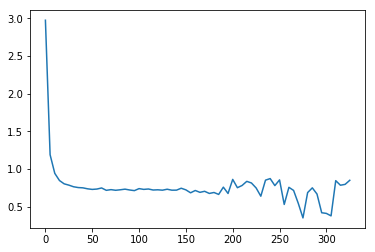

In [181]:
plt.plot(range(0,330,5), meanresponse)
plt.plot(range(0,330,5), func(1,0.5,range(0,330,5)), '-', label='_', lw=1.5, alpha=0.5)
plt.xlim(5,100)
plt.ylim(0.7,1.25)